# **Assessed Task 3: Specification**

## **CalTech-101 dataset**

The dataset [CalTech-101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/), which contains around 9000 labeled images belonging to 101 object categories. However, we will exclude 5 of the categories which have the most images. This is in order to keep the class distribution fairly balanced (around 50-100) and constrained to a smaller number of images, around 6000.

The following cell loads our custom dataset correctly by just replacing root with your folder. If we have an alternate structure, we just need to make sure that we load the list data where every element is a dict where x is the data (a 1-d numpy array) and y is the label (an integer). Use the helper function get_image(path) to load the image correctly into the array, and note also that the images are being resized to 224x224. This is necessary because the input to ResNetV2 is a 224x224 RGB image. We do not need to resize them on our hard drive, as that is being done in the code below.

If we have 101_ObjectCategories in our data folder, the following cell should load all the data.

In [ ]:
!echo "Downloading 101_Object_Categories for image notebooks"
!curl -L -o 101_ObjectCategories.tar.gz --progress-bar http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz
!tar -xzf 101_ObjectCategories.tar.gz
!rm 101_ObjectCategories.tar.gz
!ls

######################################################################## 100.0%
101_ObjectCategories  sample_data


In [ ]:
import os

root = '101_ObjectCategories'
exclude = ['BACKGROUND_Google', 'Motorbikes', 'airplanes', 'Faces_easy', 'Faces']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

print(exclude)

['101_ObjectCategories/helicopter', '101_ObjectCategories/ibis', '101_ObjectCategories/Leopards', '101_ObjectCategories/car_side', '101_ObjectCategories/chair', '101_ObjectCategories/accordion', '101_ObjectCategories/tick', '101_ObjectCategories/platypus', '101_ObjectCategories/wheelchair', '101_ObjectCategories/lotus', '101_ObjectCategories/ceiling_fan', '101_ObjectCategories/mayfly', '101_ObjectCategories/gerenuk', '101_ObjectCategories/joshua_tree', '101_ObjectCategories/starfish', '101_ObjectCategories/ferry', '101_ObjectCategories/flamingo', '101_ObjectCategories/metronome', '101_ObjectCategories/windsor_chair', '101_ObjectCategories/umbrella', '101_ObjectCategories/kangaroo', '101_ObjectCategories/barrel', '101_ObjectCategories/hawksbill', '101_ObjectCategories/grand_piano', '101_ObjectCategories/cellphone', '101_ObjectCategories/lamp', '101_ObjectCategories/yin_yang', '101_ObjectCategories/brain', '101_ObjectCategories/water_lilly', '101_ObjectCategories/bonsai', '101_ObjectCate

This function is useful for pre-processing the data into an image and input vector.

In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Load all the images from root folder

In [ ]:
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image

data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

Using TensorFlow backend.


Randomize the data order.

In [ ]:
import random

random.shuffle(data)

create training / validation / test split (70%, 15%, 15%)

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

Separate data for labels.

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[74, 11, 9, 38, 88, 33, 75, 76, 16, 73, 87, 78, 13, 95, 84, 33, 9, 0, 76, 39, 66, 16, 47, 77, 9, 70, 87, 3, 76, 82, 67, 30, 57, 69, 2, 34, 68, 69, 2, 40, 23, 81, 32, 5, 72, 80, 83, 76, 0, 93, 73, 56, 60, 11, 21, 86, 81, 75, 90, 20, 36, 0, 87, 28, 30, 47, 73, 14, 88, 2, 10, 90, 18, 1, 69, 22, 44, 70, 5, 30, 4, 37, 88, 61, 30, 22, 18, 85, 32, 64, 38, 54, 71, 76, 4, 71, 6, 4, 27, 62, 30, 87, 0, 71, 2, 7, 18, 94, 67, 3, 24, 31, 0, 94, 60, 59, 89, 79, 31, 52, 34, 53, 74, 2, 87, 38, 38, 8, 33, 8, 76, 11, 61, 14, 33, 7, 66, 3, 49, 90, 73, 51, 44, 45, 44, 60, 68, 75, 3, 25, 63, 26, 60, 29, 76, 7, 16, 87, 46, 31, 44, 70, 22, 51, 27, 62, 40, 51, 3, 83, 23, 40, 33, 33, 57, 22, 76, 27, 72, 30, 39, 61, 84, 3, 66, 22, 48, 91, 53, 83, 23, 43, 23, 30, 29, 17, 88, 35, 73, 64, 78, 15, 2, 71, 77, 54, 78, 95, 2, 4, 36, 95, 87, 24, 25, 27, 43, 76, 76, 44, 76, 72, 82, 17, 78, 96, 21, 55, 76, 64, 9, 19, 31, 26, 56, 50, 75, 42, 19, 29, 91, 15, 2, 21, 76, 46, 8, 70, 30, 3, 44, 27, 1, 16, 67, 61, 2, 13, 40, 92,

Pre-process the data as before by making sure it's float32 and normalized between 0 and 1.

In [ ]:
import keras

# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(932, 97)


Let's get a summary of what we have.

In [ ]:
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 6209 images from 97 categories
train / validation / test split: 4346, 931, 932
training data shape:  (4346, 224, 224, 3)
training labels shape:  (4346, 97)


Notice that we divided all the data into three subsets -- a training set `train`, a validation set `val`, and a test set `test`. The reason for this is to properly evaluate the accuracy of our classifier. During training, the optimizer uses the validation set to evaluate its internal performance, in order to determine the gradient without overfitting to the training set. The `test` set is always held out from the training algorithm, and is only used at the end to evaluate the final accuracy of our model.

Let's quickly look at a few sample images from our dataset.

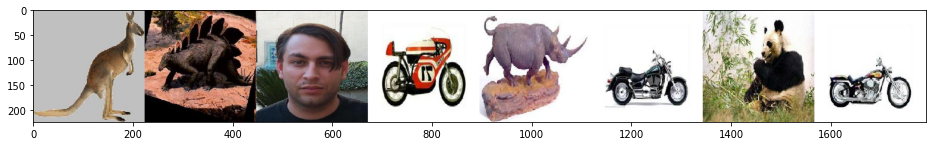

In [ ]:
import matplotlib.pyplot as plt

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# **Building a CNN (Convolutional Neural Network) from Scratch**
CNNs are regularized versions of multilayer perceptrons. 

### **1) CNN without Dropout Layer**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)  

We've created a medium-sized network with ~11.9 million weights and biases (the parameters). Most of them are leading into the one pre-softmax fully-connected layer "dense_1". As we can see, this model does not contain any dropout layer so it can cause overfitting.  

Now, we can now go ahead and train our model for 10 epochs with a batch size of 128. We'll also record its history so we can plot the loss over time later. 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 124s 29ms/step - loss: 4.7350 - accuracy: 0.0334 - val_loss: 4.4227 - val_accuracy: 0.0537
Epoch 2/10
4346/4346 [==============================] - 121s 28ms/step - loss: 4.2098 - accuracy: 0.1139 - val_loss: 3.9413 - val_accuracy: 0.1719
Epoch 3/10
4346/4346 [==============================] - 122s 28ms/step - loss: 3.4185 - accuracy: 0.2630 - val_loss: 3.4570 - val_accuracy: 0.2395
Epoch 4/10
4346/4346 [==============================] - 121s 28ms/step - loss: 2.4289 - accuracy: 0.4563 - val_loss: 3.2477 - val_accuracy: 0.2825
Epoch 5/10
4346/4346 [==============================] - 122s 28ms/step - loss: 1.3724 - accuracy: 0.6905 - val_loss: 3.3572 - val_accuracy: 0.3147
Epoch 6/10
4346/4346 [==============================] - 124s 29ms/step - loss: 0.5267 - accuracy: 0.8916 - val_loss: 3.6215 - val_accuracy: 0.3265
Epoch 7/10
4346/4346 [==============================] - 121s 28ms/step 

Let's plot the validation loss and validation accuracy over time.

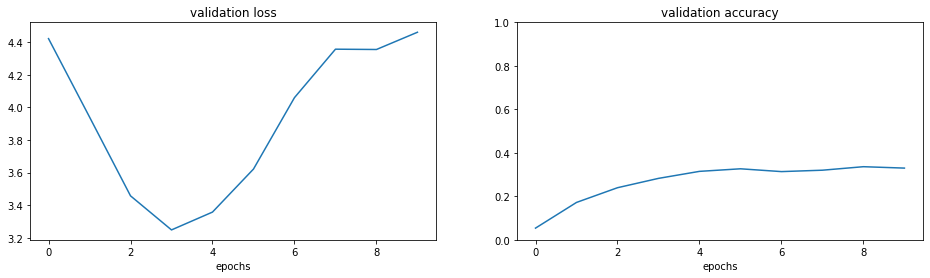

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Notice that the validation loss begins to actually rise after around 3 epochs, even though validation accuracy remains roughly between 27% and 34%. This suggests our model begins overfitting around then, and best performance would have been achieved if we had stopped early around then. Nevertheless, our accuracy would not have likely been above 34%, and probably lower down.

We can also get a final evaluation by running our model on the testing set. Doing so, we get the following results:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 4.792128536322598
Test accuracy: 0.29506438970565796


Finally, we see that we have achieved a testing accuracy around 29.5% of a model without dropout layers to predict 6000 images.
The low testing accuracy clearly specifies that our model got overfitted on training data and did not perform well on testing data. However, we can resolve this problem of overfitting to a great extent by adding some dropout layers in our CNN model.  

### **2) CNN with Dropout Layer**
Each Dropout layer will “drop” a user-defined percentage of neuron units in the previous layer every batch.

In [ ]:
# build the network
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)  

Again we've created a medium-sized network with same ~11.9 million weights and biases (the parameters). Most of them are leading into the one pre-softmax fully-connected layer "dense_5". As we can see, this model contains two 25% dropout layers so it can prevent overfitting to a great extent. 

Now, we train our model for 10 epochs with a batch size of 128. We'll also record its history so we can plot the loss over time later. 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 124s 29ms/step - loss: 4.5746 - accuracy: 0.0410 - val_loss: 4.3552 - val_accuracy: 0.0924
Epoch 2/10
4346/4346 [==============================] - 124s 29ms/step - loss: 4.0679 - accuracy: 0.1470 - val_loss: 3.8052 - val_accuracy: 0.2095
Epoch 3/10
4346/4346 [==============================] - 124s 29ms/step - loss: 3.2054 - accuracy: 0.2908 - val_loss: 3.2132 - val_accuracy: 0.3169
Epoch 4/10
4346/4346 [==============================] - 124s 28ms/step - loss: 2.1656 - accuracy: 0.4834 - val_loss: 2.9693 - val_accuracy: 0.3534
Epoch 5/10
4346/4346 [==============================] - 127s 29ms/step - loss: 1.1754 - accuracy: 0.7073 - val_loss: 3.0979 - val_accuracy: 0.3545
Epoch 6/10
4346/4346 [==============================] - 124s 29ms/step - loss: 0.6236 - accuracy: 0.8438 - val_loss: 3.3447 - val_accuracy: 0.3383
Epoch 7/10
4346/4346 [==============================] - 124s 28ms/step 

Let's plot the validation loss and validation accuracy over time.

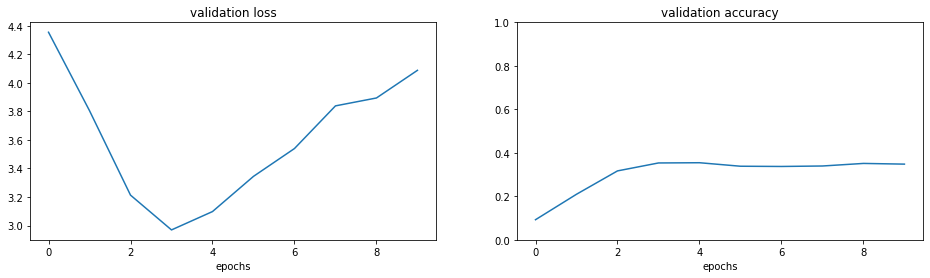

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Notice that the validation loss begins to actually rise after around 3 epochs, even though validation accuracy remains roughly between 30% and 35%. This suggests our model still overfits but in a lower extent as compared to our previous model which did not include any dropout layer.

Now, we get a final evaluation by running our model on the training set. Doing so, we get the following results:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 4.471814845252958
Test accuracy: 0.31330472230911255


Finally, we see that we have achieved a testing accuracy around 31.3% of a model with two dropout layers (each of 25%) to predict 6000 images. This 2% increase in our testing accuracy specifies that our model prevented overfitting to a little extent just by including two dropout layers of 25% in our initial CNN model.

**Therefore, using a single dropout layer increased the test accuracy of our CNN model by 2%. Where dropout Layers “turn off” neurons during training to prevent overfitting. Hence, DropOut has demonstrated how to efficiently train the networks without the need to train every layer.**

# **Applying Transfer Learning to a Pretrained Network**

## Transfer learning by starting with existing network

Now we can move on to the main strategy for training an image classifier on our dataset: by starting with a larger and already trained network.

To start, we will load the ResNet50V2 from keras, which was trained on ImageNet and the weights saved online. Once the network is loaded, we can again inspect the layers with the `summary()` method.

In [ ]:
rnv2 = keras.applications.ResNet50V2(weights='imagenet', include_top=True)
rnv2.summary()

102875136/102869336 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________

Notice that ResNet50V2 is _much_ bigger than the network we constructed earlier. It has over 26 million parameters, around more than double parameters than the network we made above. Like our first network, the majority of the parameters are stored in the connections leading into the first fully-connected layer.

VGG16 was made to solve ImageNet, and achieves a [9.3% top-5 error rate](https://keras.io/api/applications/resnet/#resnet50v2-function), which means that 90.7% of test samples were classified correctly within the top 5 predictions for each image. It's top-1 accuracy--equivalent to the accuracy metric we've been using (that the top prediction is correct)--is 76%.

### **1) First retraining, keeping all layers frozen except the last one.**
Freezing a layer in the context of neural networks is about controlling the way the weights are updated. When a layer is frozen, it means that the weights cannot be modified further.

In order to use this network for our task, we "remove" the final classification layer, the 1000-neuron softmax layer at the end, which corresponds to ImageNet, and instead replace it with a new softmax layer for our dataset, which contains 97 neurons in the case of the 101_ObjectCategories dataset. 

In terms of implementation, it's easier to simply create a copy of ResNet50V2 from its input layer until the second to last layer, and then work with that, rather than modifying the ResNet50V2 object directly. So technically we never "remove" anything, we just circumvent/ignore it. This can be done in the following way, by using the keras `Model` class to initialize a new model whose input layer is the same as ResNet50V2 but whose output layer is our new softmax layer, called `new_classification_layer`. Note: although it appears we are duplicating this large network, internally Keras is actually just copying all the layers by reference, and thus we don't need to worry about overloading the memory.

In [ ]:
from keras.models import Model
from keras.layers import Dense

# make a reference to ResNetV2's input layer
inp = rnv2.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in ResNetV2, and make a reference to it
out = new_classification_layer(rnv2.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

We are going to retrain this network, `model_new` on the new dataset and labels. But first, we need to freeze the weights and biases in all the layers in the network, except our new one at the end, with the expectation that the features that were learned in ResNet50V2 should still be fairly relevant to the new image classification task. Not optimal, but most likely better than what we can train to in our limited dataset. 

By setting the `trainable` flag in each layer false (except our new classification layer), we ensure all the weights and biases in those layers remain fixed, and we simply train the weights in the one layer at the end.

So we go ahead and freeze the layers, and compile the new model with exactly the same optimizer and loss function as in our first network, for the sake of a fair comparison. We then run `summary` again to look at the network's architecture.

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

Looking at the summary, we see the network is identical to the ResNet50V2 model we instantiated earlier, except the last layer, formerly a 1000-neuron softmax, has been replaced by a new 97-neuron softmax. Additionally, we still have roughly 24 million weights, but now the vast majority of them are "non-trainable params" because we froze the layers they are contained in. We now only have 198,753 trainable parameters, needed to train the first model.

As before, we go ahead and train the new model, using the same hyperparameters (batch size and number of epochs) as before, along with the same optimization algorithm. We also keep track of its history as we go.

In [ ]:
historyV2 = model_new.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 453s 104ms/step - loss: 2.6914 - accuracy: 0.4547 - val_loss: 0.9042 - val_accuracy: 0.7669
Epoch 2/10
4346/4346 [==============================] - 451s 104ms/step - loss: 0.6245 - accuracy: 0.8999 - val_loss: 0.5097 - val_accuracy: 0.8625
Epoch 3/10
4346/4346 [==============================] - 453s 104ms/step - loss: 0.3108 - accuracy: 0.9577 - val_loss: 0.4316 - val_accuracy: 0.8808
Epoch 4/10
4346/4346 [==============================] - 453s 104ms/step - loss: 0.1970 - accuracy: 0.9775 - val_loss: 0.4104 - val_accuracy: 0.8872
Epoch 5/10
4346/4346 [==============================] - 449s 103ms/step - loss: 0.1400 - accuracy: 0.9864 - val_loss: 0.3853 - val_accuracy: 0.8990
Epoch 6/10
4346/4346 [==============================] - 452s 104ms/step - loss: 0.1011 - accuracy: 0.9956 - val_loss: 0.3699 - val_accuracy: 0.9033
Epoch 7/10
4346/4346 [==============================] - 458s 105m

Our validation accuracy hovers close to 90% towards the end, which is approximately 60% improvement on the original network trained from scratch (meaning that we make the wrong prediction on 10% of samples, rather than 70%). 

It's worth noting also that this network actually trains _slightly faster_ than the original network, despite having twice number of parameters! This is because freezing the weights negates the need to backpropagate through all those layers, saving us on runtime.

Let's plot the validation loss and accuracy again, this time comparing the original model trained from scratch (in blue) and the new transfer-learned model in green.

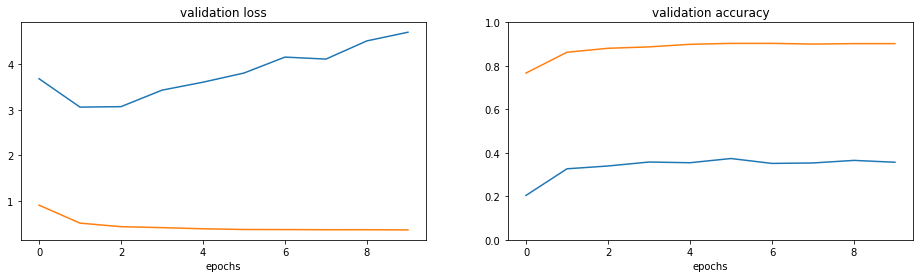

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(historyV2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(historyV2.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

Notice that whereas the original model began overfitting around epoch 3, the new model continued to slowly decrease its loss over time, and likely would have improved its accuracy slightly with more iterations. The new model made it to roughly 90% top-1 accuracy (in the validation set) and continued to improve slowly through 10 epochs.

It's possibly we could have improved the original model with better regularization or more dropout, but we surely would not have made up the >60% improvement in accuracy. 

Again, we do a final validation on the test set.

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3805918338280891
Test accuracy: 0.8991416096687317


**Finally, using ResNetV2 we got 89.91% (approximately 90%) accuracy on our testing data. Whereas our initial model achieved an accuracy of 30%, so after using ResNetV2 our accuracy increased by 60%** 

### **2) Retraining again, unfreezing one extra layer.**

Firstly, we "remove" the final classification layer of ResNet50V2, the 1000-neuron softmax layer at the end, and replace it with a new softmax layer containing 97 neurons. 

To implement, we again create a copy of ResNet50V2 from its input layer until the second to last layer as we did before.

In [ ]:
# make a reference to ResNetV2's input layer
inp = rnv2.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer from second to last layer in ResNetV2, and make a reference to it
out = new_classification_layer(rnv2.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

So, now we need to freeze the weights and biases in all the layers in the network, except the last two layers (the last one is our new one).

By setting the `trainable` flag in each layer false (except our new classification layer & the second last layer as well), we ensure all the weights and biases in those layers remain fixed, and we simply train the weights in last two layers at the end. 


In some cases, it is desirable to *not* freeze all the pre-classification layers. If our dataset has enough samples, and doesn't resemble ImageNet very much, it might be advantageous to fine-tune some of the ResNet50V2 layers along with the new classifier at the end, or possibly even all of them.

So we go ahead and freeze the layers, and compile the new model with exactly the same optimizer and loss function as in our previous pretrained network, for the sake of a fair comparison. We then run `summary` again to look at the network's architecture.

In [ ]:
# make all layers untrainable by freezing weights (except for last two layers)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

Looking at the summary, we see the network is still identical to the ResNet50V2 model we instantiated just previously, except the second last layer, which is also unfrozed now along with the last layer. Additionally, we still have roughly 24 million weights and 198,753 "trainable params".
But, unfrozing that extra second last layer will definitely make an effect on our accuracy.

In [ ]:
historyV2_new = model_new.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 414s 95ms/step - loss: 2.7654 - accuracy: 0.4462 - val_loss: 0.9664 - val_accuracy: 0.7583
Epoch 2/10
4346/4346 [==============================] - 419s 96ms/step - loss: 0.6505 - accuracy: 0.8912 - val_loss: 0.5450 - val_accuracy: 0.8475
Epoch 3/10
4346/4346 [==============================] - 417s 96ms/step - loss: 0.3218 - accuracy: 0.9554 - val_loss: 0.4559 - val_accuracy: 0.8743
Epoch 4/10
4346/4346 [==============================] - 413s 95ms/step - loss: 0.2028 - accuracy: 0.9800 - val_loss: 0.4150 - val_accuracy: 0.8840
Epoch 5/10
4346/4346 [==============================] - 419s 96ms/step - loss: 0.1436 - accuracy: 0.9869 - val_loss: 0.3931 - val_accuracy: 0.8861
Epoch 6/10
4346/4346 [==============================] - 416s 96ms/step - loss: 0.1068 - accuracy: 0.9952 - val_loss: 0.3817 - val_accuracy: 0.8915
Epoch 7/10
4346/4346 [==============================] - 414s 95ms/step 

Again, our validation accuracy is close to 90% same as our previous pretrained network which had only. 
It's worth noting also that this network actually trains _slightly faster_ than the previous network where we unfrezed just the last layer of ResNet50V2 model.
Let's plot the validation loss and accuracy again, this time comparing the original model trained from scratch (in blue) and the new transfer-learned model in green.


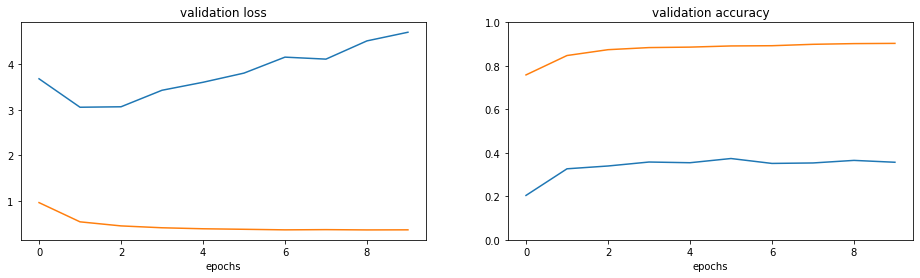

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(historyV2_new.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.plot(historyV2_new.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

The validation loss and valiadtion accuracy of this model (where we unfrezed two layers) is still approximately same to the initial pretrained model (where we unfrezed only the last layer) regardless of some minor changes.   
Again, we do a last validation on the test set to recognize the difference in these two Transfer Learning pretrained networks.

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3760436128009542
Test accuracy: 0.8948497772216797


Finally, by unfreezing one extra layer (unfreezing total two layers) in ResNetV2 we got 89.48% accuracy on our testing data. However, by unfreezing only the last layer in ResNetV2 we got 89.91% accuracy on our testing data.
That means after unfreezing one extra layer, the accuracy decreased by just 0.43% which is a very insignificant change.

**Hence, we conclude this technique, as obvious as it may sound is to cut down on the computational time for training while losing not much on the accuracy side.** 

### Improving the results

89.91% top-1 accuracy on 97 classes, roughly evenly distributed, is a pretty good achievement. Nevertheless, it is much better than what we were able to achieve with our original network, and there is room for improvement. Some techniques which possibly could have improved our performance.

- Using data augementation: augmentation refers to using various modifications of the original training data, in the form of distortions, rotations, rescalings, lighting changes, etc to increase the size of the training set and create more tolerance for such distortions.

# **Apply Data Augmentation to a Pretrained Network**

Now, we will retrain our ResNet-50V2 model again, this time including some data augmentation. 

In [ ]:
# make a reference to ResNetV2's input layer
inp = rnv2.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in ResNetV2, and make a reference to it
out = new_classification_layer(rnv2.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

In [ ]:
model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# this is the augmentation configuration we will use for training
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

These are some of the options that we used for Data Augmentation to modify our original training data, in the form of distortions, rotations, rescalings, lighting changes, etc to increase the size of the training set and create more tolerance for such distortions.
Let's quickly go over what we just wrote:
- **rotation_range** is a value in degrees (0-180), a range within which to randomly rotate pictures
- **width_shift and height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- **rescale** is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- **shear_range** is for randomly applying shearing transformations
zoom_range is for randomly zooming inside pictures
- **zoom_range** A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.
- **horizontal_flip** is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- **fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
historyV2_DA = model_new.fit_generator(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
34/34 [==============================] - 476s 14s/step - loss: 3.2779 - accuracy: 0.3111 - val_loss: 1.2963 - val_accuracy: 0.6724
Epoch 2/10
34/34 [==============================] - 469s 14s/step - loss: 1.3493 - accuracy: 0.7269 - val_loss: 0.6658 - val_accuracy: 0.8077
Epoch 3/10
34/34 [==============================] - 467s 14s/step - loss: 0.8950 - accuracy: 0.8033 - val_loss: 0.5184 - val_accuracy: 0.8507
Epoch 4/10
34/34 [==============================] - 466s 14s/step - loss: 0.6935 - accuracy: 0.8410 - val_loss: 0.4314 - val_accuracy: 0.8722
Epoch 5/10
34/34 [==============================] - 463s 14s/step - loss: 0.5783 - accuracy: 0.8705 - val_loss: 0.3921 - val_accuracy: 0.8861
Epoch 6/10
34/34 [==============================] - 465s 14s/step - loss: 0.4983 - accuracy: 0.8873 - val_loss: 0.4009 - val_accuracy: 0.8765
Epoch 7/10
34/34 [==============================] - 466s 14s/step - loss: 0.4387 - accuracy: 0.9011 - val_loss: 0.3733 - val_accuracy: 0.8872
Epoch 

Here, we got approximately 90% accuracy on our validation set after using Data Augmentation.

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3399916462632208
Test accuracy: 0.9206008315086365


**As we can see, after applying Data Augmentation techniques our testing accuracy i.e. 92% now, showed a significant increase of 2%. So, the test accuracy of our initial CNN model that we made from scratch was around 32%, besides the accuracy of our Transfer Learing Pretrained Network was around 90%. However, when we applied Data Augmentation technique on on our Pretrained model then its accuracy increased drastically by 2%. Therefore, Data Augmentation techniques can undoubtedly improve our model performance to a great extent..**